In [5]:
import lucem_illud_2020
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.pyplot import imshow
%matplotlib inline


In [2]:
# My own dataset
df = pd.read_csv("/Users/shiyipeng/Downloads/online_shoppers_intention 2.csv")
df = pd.DataFrame(df)
s0 = df['ProductRelated']
s1 = df['ProductRelated_Duration']
s2 = df['Weekend']
cat = list(map(int,s2))
d = {'ProductRelated':s0,'ProductRelated_Duration':s1,'Category':cat}
df = pd.DataFrame(d)
df = df[pd.notnull(df['ProductRelated'])]
df_train = df.iloc[:100]
df_train


,ProductRelated,ProductRelated_Duration,Category
0,1.0,0.000000,0
1,2.0,64.000000,0
2,1.0,-1.000000,0
3,2.0,2.666667,0
4,10.0,627.500000,1
...,...,...,...
95,2.0,33.000000,0
96,6.0,1566.500000,0
97,4.0,105.000000,0
98,7.0,50.000000,0


In [3]:
#Naive Bayes
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
X


array([[  1.  ,   0.  ],
       [  2.  ,  64.  ],
       [  1.  ,  -1.  ],
       ...,
       [  6.  , 184.25],
       [ 15.  , 346.  ],
       [  3.  ,  21.25]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

array([[7.00000000e+00, 5.80000000e+01],
       [3.40000000e+01, 1.04849206e+03],
       [6.00000000e+00, 1.63250000e+02],
       ...,
       [1.53000000e+02, 5.31521191e+03],
       [2.00000000e+00, 8.00000000e+00],
       [3.60000000e+01, 2.54233333e+03]])

In [39]:
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred, y_test_pred

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [41]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[2861,    0],
       [ 834,    0]])

In [42]:
evaluation_b = metrics.accuracy_score(y_test, y_test_pred)
print(f'evaluation: {evaluation_b}')

evaluation: 0.7742895805142084


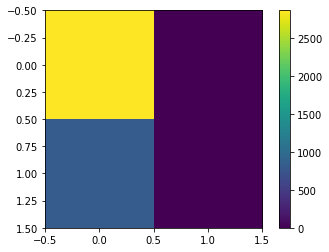

In [43]:
plt.imshow(cm_test)
plt.colorbar()
plt.show()



In [10]:
#K-neighborhood
clf_kn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf_kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [11]:
y_train_pred_kn = clf_kn.predict(X_train)
y_test_pred_kn = clf_kn.predict(X_test)
y_train_pred_kn, y_test_pred_kn

(array([0, 1, 0, ..., 0, 0, 1]), array([0, 0, 0, ..., 0, 0, 1]))

In [12]:
evaluation_kn = metrics.accuracy_score(y_test, y_test_pred_kn)
evaluation_kn

0.7087956698240866

In [13]:
cm_test_kn = confusion_matrix(y_test, y_test_pred_kn)
cm_test_kn

array([[2509,  352],
       [ 724,  110]])

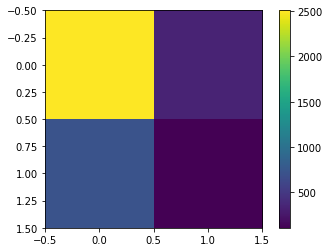

In [14]:
plt.imshow(cm_test_kn)
plt.colorbar()
plt.show()

In [ ]:
from sklearn import svm
random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state)
y_score_kn = classifier.fit(X_train, y_train).decision_function(X_test_kn)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_kn[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_kn.ravel(), y_score_kn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Intention')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Classical Regression

clf_lr = sklearn.linear_model.LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_test_pred_lr = clf_lr.predict(X_test)
evaluation_lr = metrics.accuracy_score(y_test, y_test_pred_lr)
print(f'evaluation:{evaluation_lr}')

mse=metrics.mean_squared_error(y_test, y_test_pred_lr)
print(f'mean_squared_log_error: {mse}')

evaluation:0.7742895805142084
mean_squared_log_error: 0.2257104194857916


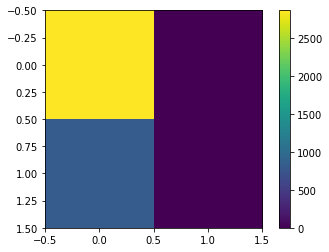

In [31]:
cm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
cm_test_lr
plt.imshow(cm_test_lr)
plt.colorbar()
plt.show()


In [33]:
#Symbolists
clf_s = sklearn.tree.DecisionTreeClassifier()
clf_s.fit(X_train,y_train)

y_test_pred_s = clf_s.predict(X_test)
print(f'predictionon test: {y_test_pred_s}')
      
evaluation_s = metrics.accuracy_score(y_test, y_test_pred_s)
print(f'evaluation:{evaluation_s}')
      
mse_s=metrics.mean_squared_error(y_test, y_test_pred_s)
print(f'mean_squared_log_error: {mse_s}')

predictionon test: [0 0 0 ... 0 1 1]
evaluation:0.6489851150202977
mean_squared_log_error: 0.3510148849797023


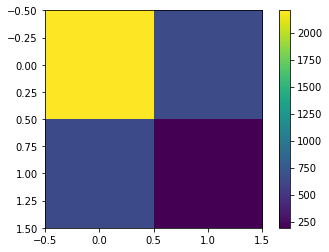

In [34]:
cm_test_s = confusion_matrix(y_test, y_test_pred_s)
cm_test_s
plt.imshow(cm_test_s)
plt.colorbar()
plt.show()


In [35]:
#Connectionists
clf_c = sklearn.neural_network.MLPClassifier()
clf_c.fit(X_train,y_train)

y_test_pred_c = clf_c.predict(X_test)
print(f'predictionon test: {y_test_pred_c}')
      
evaluation_c = metrics.accuracy_score(y_test, y_test_pred_c)
print(f'evaluation:{evaluation_c}')
      
mse_c=metrics.mean_squared_error(y_test, y_test_pred_c)
print(f'mean_squared_log_error: {mse_c}')

predictionon test: [0 0 0 ... 0 0 0]
evaluation:0.7742895805142084
mean_squared_log_error: 0.2257104194857916


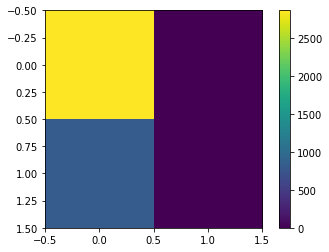

In [36]:
cm_test_c = confusion_matrix(y_test, y_test_pred_c)
cm_test_c
plt.imshow(cm_test_c)
plt.colorbar()
plt.show()

In [37]:
#Ensemble
clf_e = sklearn.ensemble.GradientBoostingClassifier()

clf_e.fit(X_train,y_train)

y_test_pred_e = clf_e.predict(X_test)
print(f'predictionon test: {y_test_pred_e}')
      
evaluation_e = metrics.accuracy_score(y_test, y_test_pred_e)
print(f'evaluation:{evaluation_e}')
      
mse_e=metrics.mean_squared_error(y_test, y_test_pred_e)
print(f'mean_squared_log_error: {mse_e}')



predictionon test: [0 0 0 ... 0 0 0]
evaluation:0.7734776725304465
mean_squared_log_error: 0.22652232746955345


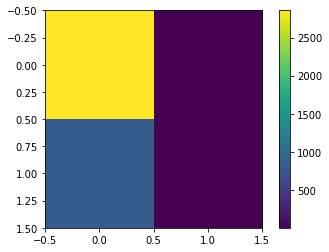

In [38]:
cm_test_e = confusion_matrix(y_test, y_test_pred_e)
cm_test_e
plt.imshow(cm_test_e)
plt.colorbar()
plt.show()

In [ ]:
'''In terms of accuracy, Naive Bayes, classical regression and connectionists models generate the same result in my case dataset.'''

In [75]:
#AdaBoost

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),)
clf_ada.fit(X_train,y_train)
predicted_ada = clf_ada.predict(X_test)

evaluation_ada = metrics.accuracy_score(y_test, predicted_ada)
print(f'evaluation:{evaluation_ada}')
      
mse_ada=metrics.mean_squared_error(y_test, predicted_ada)
print(f'mean_squared_log_error: {mse_ada}')


evaluation:0.7737483085250338
mean_squared_log_error: 0.22625169147496618


In [76]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
clf_ada.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [78]:
print(lucem_illud_2020.evaluateClassifier(clf_ada, dfTest))

                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
rec.autos                0.178723  0.824345   0.604938           0.544960   
comp.windows.x           0.055319  0.922361   0.880734           0.803352   
comp.sys.mac.hardware    0.117021  0.800513   0.839080           0.624540   
misc.forsale             0.112766  0.837948   0.839286           0.686041   

                         Recall  
Category                         
rec.autos              0.830508  
comp.windows.x         0.880734  
comp.sys.mac.hardware  0.640351  
misc.forsale           0.728682  


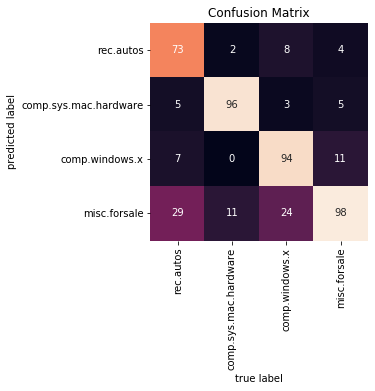

In [79]:
lucem_illud_2020.plotConfusionMatrix(clf_ada, dfTest)

In [80]:

import sklearn.feature_extraction
from sklearn import datasets

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())


Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


In [109]:
dfTrain

,text,category,source_file,tokenized_text,normalized_text,vect
2296,Could someone out there please tell me how I c...,rec.autos,../data/20news_home/20news-bydate-train/rec.au...,"[Could, someone, out, there, please, tell, me,...","[tell, saab, mail, list, specifically, need, a...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,{Send follow ups to comp.sys.mac.advocacy. Sor...,comp.sys.mac.hardware,../data/20news_home/20news-bydate-train/comp.s...,"[Send, follow, ups, to, comp.sys.mac.advocacy,...","[send, follow, up, comp.sys.mac.advocacy, sorr...","[0.0, 0.0, 0.005235062817741617, 0.0, 0.0, 0.0..."
654,#\n#Do anyone know about any shading program b...,comp.windows.x,../data/20news_home/20news-bydate-train/comp.w...,"[Do, anyone, know, about, any, shading, progra...","[know, shade, program, base, xlib, public, dom...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1247,This is a repost of an earlier. Thanks to sev...,misc.forsale,../data/20news_home/20news-bydate-train/misc.f...,"[This, is, a, repost, of, an, earlier, Thanks,...","[repost, early, thank, offer, advise, realisti...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
739,"Hi Guys,\n\n\tIt has been a long time since I ...",comp.windows.x,../data/20news_home/20news-bydate-train/comp.w...,"[Hi, Guys, It, has, been, a, long, time, since...","[hello, guy, long, time, write, program, x., t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1657,I have one round-trip ticket good for travel b...,misc.forsale,../data/20news_home/20news-bydate-train/misc.f...,"[I, have, one, round, trip, ticket, good, for,...","[round, trip, ticket, good, travel, usa, canad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1158,\nThe following packages meet your criteria in...,comp.windows.x,../data/20news_home/20news-bydate-train/comp.w...,"[The, following, packages, meet, your, criteri...","[follow, package, meet, criterium, pd, present...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,\n\n\nThe previous article referred to the fac...,comp.sys.mac.hardware,../data/20news_home/20news-bydate-train/comp.s...,"[The, previous, article, referred, to, the, fa...","[previous, article, refer, fact, use, 20ns, si...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2034,\n--AutoWeek had an article about the car with...,rec.autos,../data/20news_home/20news-bydate-train/rec.au...,"[--AutoWeek, had, an, article, about, the, car...","[--autoweek, article, car, past, week, issue, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [81]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print(lucem_illud_2020.evaluateClassifier(clf, dfTest))

                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
rec.autos                0.082979  0.913038   0.789474           0.738014   
comp.windows.x           0.048936  0.931762   0.926230           0.853913   
comp.sys.mac.hardware    0.063830  0.895202   0.900000           0.778917   
misc.forsale             0.072340  0.900414   0.860870           0.766726   

                         Recall  
Category                         
rec.autos              0.905172  
comp.windows.x         0.889764  
comp.sys.mac.hardware  0.818182  
misc.forsale           0.846154  


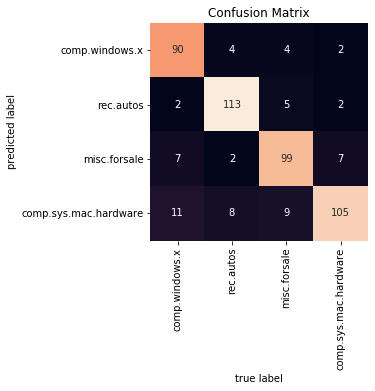

In [82]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

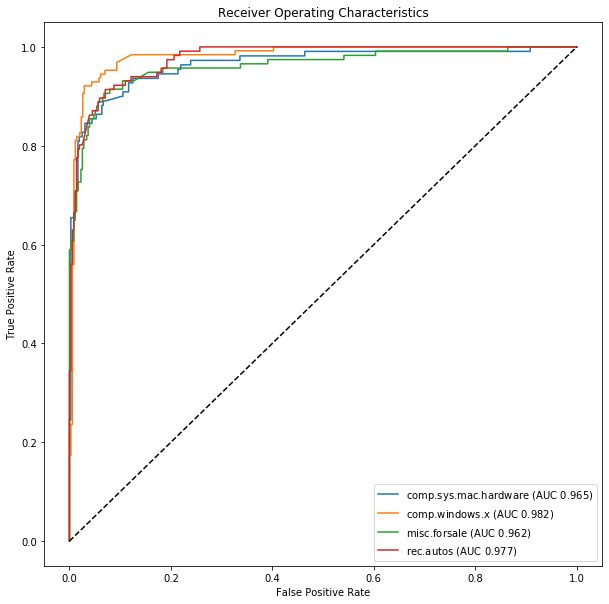

In [83]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

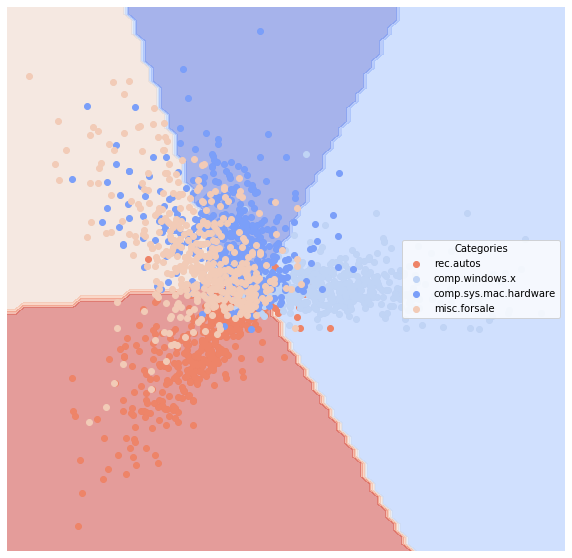

In [84]:
lucem_illud_2020.plotregions(clf, dfTrain)

In [110]:
#Exercise 2

f = "/Users/shiyipeng/Downloads/twitter-airline-sentiment/Tweets.csv"
df = pd.read_csv(f,encoding = "ISO-8859-1")
df = df[:2000]
df = df[['tweet_id','airline_sentiment','airline','text']]
df.columns = ['id','sentiment','airline','text']
df.head

<bound method NDFrame.head of                       id sentiment         airline  \
0     570306133677760513   neutral  Virgin America   
1     570301130888122368  positive  Virgin America   
2     570301083672813571   neutral  Virgin America   
3     570301031407624196  negative  Virgin America   
4     570300817074462722  negative  Virgin America   
...                  ...       ...             ...   
1995  569484788404322304  negative          United   
1996  569484671672651776  negative          United   
1997  569484085397057536  negative          United   
1998  569483390581383168  positive          United   
1999  569481897203494914  negative          United   

                                                   text  
0                   @VirginAmerica What @dhepburn said.  
1     @VirginAmerica plus you've added commercials t...  
2     @VirginAmerica I didn't today... Must mean I n...  
3     @VirginAmerica it's really aggressive to blast...  
4     @VirginAmerica and it's a

In [111]:
df['category'] = [s == 'neutral' for s in df['sentiment']]
#print(df['category'])
df['tokenized_text'] = df['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
holdBackFraction = .4
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)
print(len(train_data_df))
print(len(test_data_df))
print(train_data_df.head)

1200
800
<bound method NDFrame.head of                       id sentiment         airline  \
179   569324558999691264   neutral  Virgin America   
101   569892199690678272  negative  Virgin America   
1554  569666428388958209   neutral          United   
645   570230752476049408   neutral          United   
175   569356387785900032   neutral  Virgin America   
...                  ...       ...             ...   
1429  569723892358467584  negative          United   
442   568053134439788546   neutral  Virgin America   
1484  569702566126325760  negative          United   
295   568837602071203840   neutral  Virgin America   
623   570245555064074240  negative          United   

                                                   text  category  \
179                   @VirginAmerica @TTINAC11 I DM you      True   
101   @VirginAmerica why must a traveler miss a flig...     False   
1554  @united left my iPad on MCO-&gt;IAD flight 174...      True   
645   @united A Tourist Wonder: Supe

In [114]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=2000, min_df=1, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

TFVects.shape

(1200, 3245)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


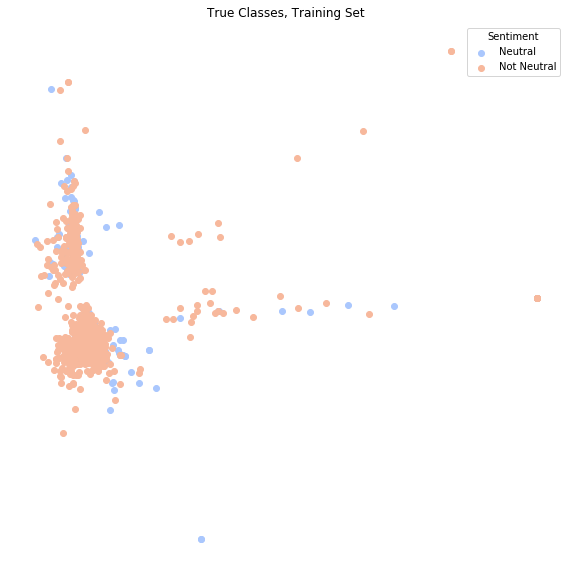

In [115]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

    
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'],axis=0))
train_data_df['pca'] = [r for r in reduced_data]

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot neutral
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Neutral")

#Plot not neutral
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Not Neutral")
    
ax.legend(loc = 'upper right', title = 'Sentiment')
plt.title('True Classes, Training Set')
plt.show()

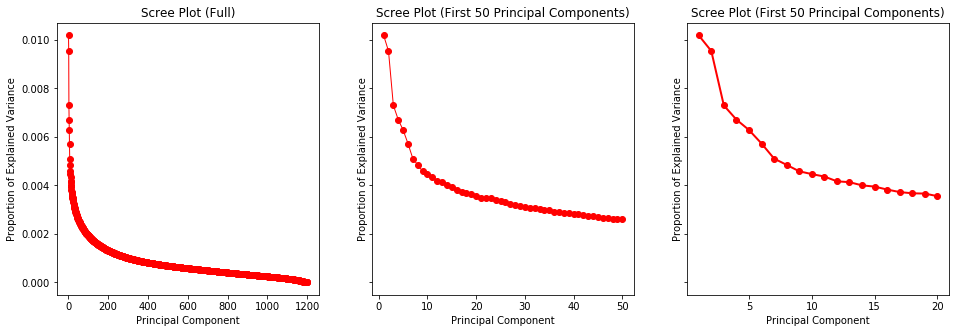

In [89]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [116]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])
print(train_data_df['pca_reduced_10'])

179     [0.016007111403910017, 0.20025036277905187, 0....
101     [-0.09191784332794876, 0.042294178974874676, -...
1554    [-0.03144037298048806, -0.05129264318630201, -...
645     [-0.009282190622061499, -0.0034446680509092682...
175     [-0.04050073232626786, 0.17753763850877388, -0...
                              ...                        
1429    [-0.014436319390928066, -0.06140589722456736, ...
442     [-0.03127698344359503, 0.16582225331834916, -0...
1484    [0.0268264972541374, -0.07416308364677067, 0.0...
295     [-0.033180198609930385, 0.13776616771974393, 0...
623     [-0.03805783260712196, -0.021668820426856934, ...
Name: pca_reduced_10, Length: 1200, dtype: object


In [117]:
#Logistic Regression
import numpy as np
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'],axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.7891666666666667

In [119]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
print(test_data_df['vect'])

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

1855    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1487    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
727     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1401    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
890     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1815    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
746     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1796    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1656    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
451     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vect, Length: 800, dtype: object


0.8

In [120]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7941666666666667
Testing:
0.7975


In [121]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.7983333333333333
Testing:
0.80125


In [122]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

#Logistic Regression
logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.7966666666666666
Testing:
0.80375


In [123]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.8
Testing:
0.80375


In [124]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.80375


In [126]:
#Naive Bayes

naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [127]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.8583333333333333
Testing:
0.8075


In [131]:
#Precision
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0]
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8

In [103]:
#Recall
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8333333333333334

In [104]:
#F1-measure
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.060240963855421686

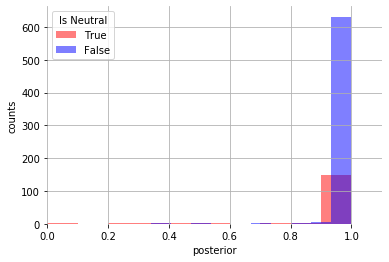

In [105]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Neutral")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

In [106]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'neutral' : [],
    'neutral_log_prob' : [],
    'not_neutral' : [],
    'notneutral_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['neutral'].append(TFVectorizer.get_feature_names()[i])
    words_dict['neutral_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['not_neutral'].append(TFVectorizer.get_feature_names()[i])
    words_dict['notneutral_log_prob'].append(prob)
    
pd.DataFrame(words_dict)

,neutral,neutral_log_prob,not_neutral,notneutral_log_prob
0,united,-0.243768,united,-0.521095
1,flight,-1.483090,virginamerica,-0.901081
2,virginamerica,-1.521190,flight,-1.826851
3,service,-2.531578,http,-1.900959
4,just,-2.545001,need,-2.345645
5,thanks,-2.806015,dm,-2.620081
6,delayed,-2.823715,flights,-2.791932
7,customer,-2.841733,know,-2.999571
8,http,-2.841733,thanks,-2.999571
9,time,-2.878774,flying,-3.166625


In [ ]:
'''
In my sentiment analysis on United Airline, logistic regression with 400 dimensions print the best predictions. It seems undoubtedly that the more dimensions are incorperated in PCA, the result will be more accurate. F1-measure returns a very bad result. From the posterior distribution we can tell that neutral comments are much less than non neutral comments. However, it gets confusing when we look at the top indices, we see words like "cancelled" and "thanks" are also classified as neutral comments. It reflects a fact in airline that such words are normally used so that their sentimental dependence has been reduced. 
'''

In [146]:
# Exercise 3
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])

Vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=2000, min_df=1, stop_words='english', norm='l2')
Vects = TFVectorizer.fit_transform(df['text'])
df['vect'] = [np.array(v).flatten() for v in Vects.todense()]

df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(df)
df_exampleTree_train.head


#df_exampleTree_train['vect'] = [np.array(v).flatten() for v in Vects.todense()]
#df_exampleTree_test['vect'] = [np.array(v).flatten() for v in Vects.todense()]

<bound method NDFrame.head of                       id sentiment         airline  \
413   568144330268868608   neutral  Virgin America   
1807  569577455176048642  negative          United   
1522  569683734951170048  negative          United   
1912  569523440547291136  negative          United   
1589  569654428636049408   neutral          United   
...                  ...       ...             ...   
1274  569857624549625856  negative          United   
551   570284312697765888   neutral          United   
1311  569838692220542976  negative          United   
609   570252146320351232  negative          United   
1911  569523831460761601  negative          United   

                                                   text  category  \
413            @VirginAmerica no A's channel this year?      True   
1807  @united more people would catch their flights ...     False   
1522  @united resolved and im sick and tired of wait...     False   
1912  .@united Our newest delay, right now ht

In [147]:
clf_trees = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)

clf_trees.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


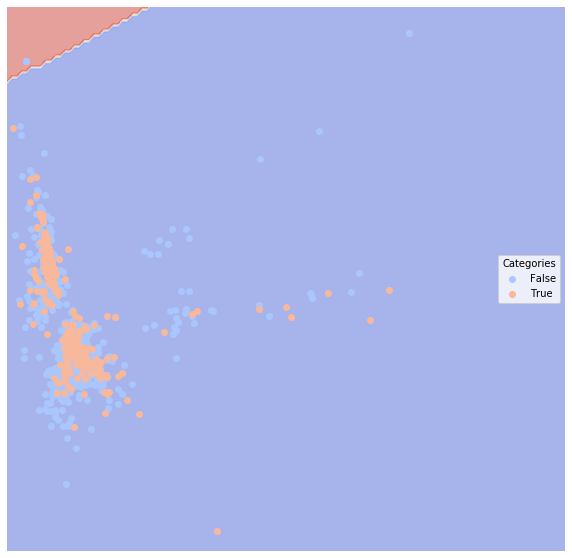

In [148]:
lucem_illud_2020.plotregions(clf_trees, df_exampleTree_train)

In [149]:
lucem_illud_2020.evaluateClassifier(clf_trees, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.1775,0.569159,0.827676,0.827324,0.984472
True,0.1775,0.569159,0.705882,0.273597,0.153846


In [151]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_trees.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.8225

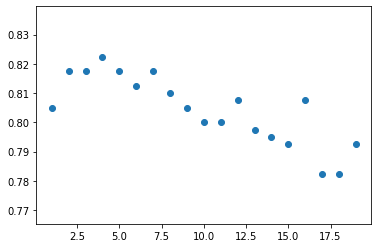

In [152]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


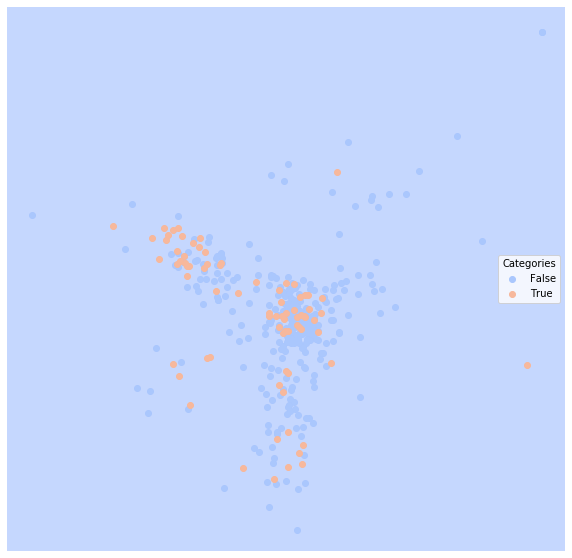

In [191]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree us
print(bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])) #

lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [154]:

lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.185,0.554786,0.822917,0.822583,0.981366
True,0.185,0.554786,0.625000,0.250128,0.128205


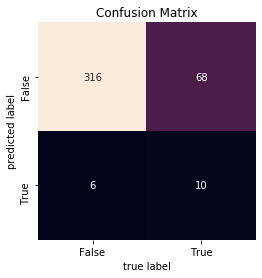

In [155]:

lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

In [157]:
#F1-measure
sklearn.metrics.f1_score(df_exampleTree_test['category'], clf_trees.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.25263157894736843

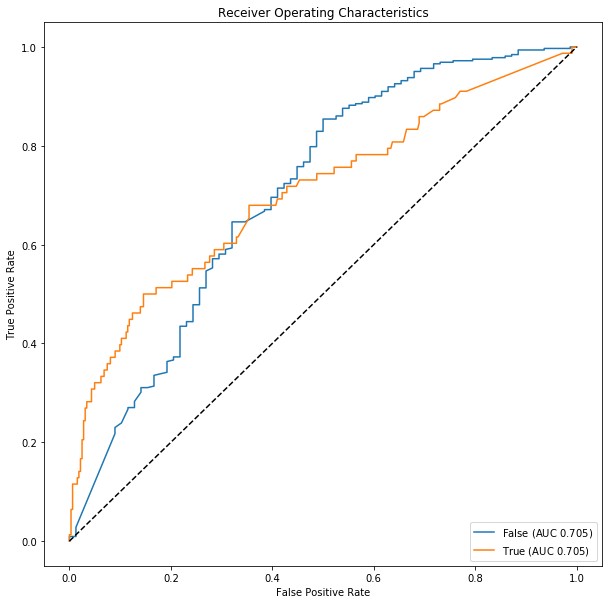

In [166]:
lucem_illud_2020.plotMultiROC(bag, df_exampleTree_test)

In [ ]:
'''Decision tree performs slightly better than random forest calssification. '''

In [167]:
#Exercise 4
df[:5]

,id,sentiment,airline,text,category,tokenized_text,normalized_text,vect
0,570306133677760513,neutral,Virgin America,@VirginAmerica What @dhepburn said.,True,"[@VirginAmerica, What, @dhepburn, said]","[@virginamerica, @dhepburn, say]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,570301130888122368,positive,Virgin America,@VirginAmerica plus you've added commercials t...,False,"[@VirginAmerica, plus, you, 've, added, commer...","[@virginamerica, plus, have, add, commercial, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,570301083672813571,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,True,"[@VirginAmerica, I, did, n't, today, Must, mea...","[@virginamerica, today, mean, need, trip]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,570301031407624196,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,False,"[@VirginAmerica, it, 's, really, aggressive, t...","[@virginamerica, aggressive, blast, obnoxious,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,570300817074462722,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,False,"[@VirginAmerica, and, it, 's, a, really, big, ...","[@virginamerica, big, bad, thing]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [168]:
holdBackFraction=.2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)

In [169]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [170]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [171]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [172]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.139375,0.679474,0.859589,0.858685,0.985860
True,0.139375,0.679474,0.871429,0.453245,0.373089


In [173]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.77


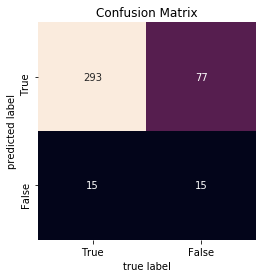

In [174]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

In [ ]:
'''K-nearest neighbor algorithm is mainly used for classification and regression of given data when the attribute is already known.'''

In [180]:
#EXercise 5
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5,min_df=3,stop_words='english')
TFVects = TFVectorizer.fit_transform([' '.join(l) for l in df['normalized_text']])
df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [182]:
holdBackFraction = .2
train_Df, test_Df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_Df['vect'], axis=0), train_Df['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [183]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_Df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.19,0.595313,0.833333,0.831771,0.953125
True,0.19,0.595313,0.558824,0.285221,0.237500


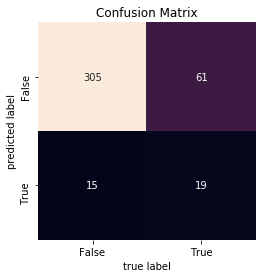

In [184]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_Df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


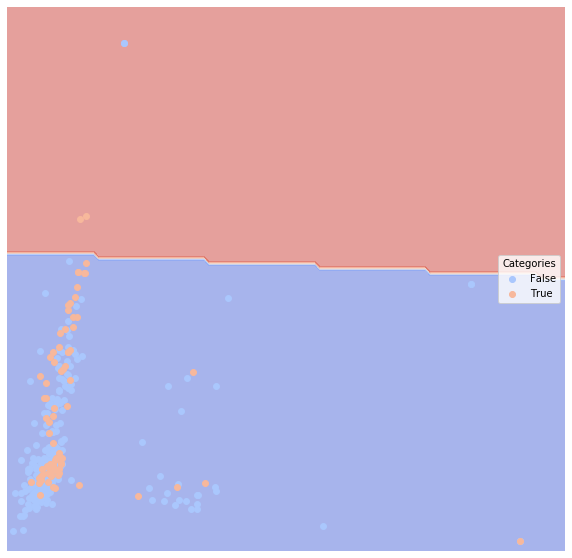

In [185]:
lucem_illud_2020.plotregions(clf_svm, test_Df)

In [187]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_Df['vect'], axis=0), train_Df['category'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [188]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_Df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.215,0.635938,0.852410,0.846350,0.884375
True,0.215,0.635938,0.455882,0.299154,0.387500


In [189]:
#F1-measure
sklearn.metrics.f1_score(test_Df['category'], clf_nn.predict(np.stack(test_Df['vect'], axis = 0)))

0.41891891891891897

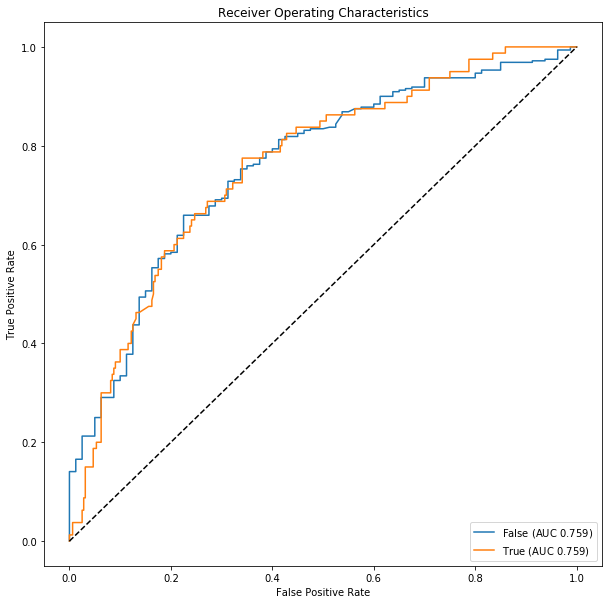

In [190]:
lucem_illud_2020.plotMultiROC(clf_nn, test_Df)

In [ ]:
'''The neutral nets model has an obviously higher f1 score, meaning that it reaches better precision and recall than other models'''